In [36]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from random import random
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm

In [63]:
def generate_points_in_circle(n, radius):
    points = []
    for i in range(n):
        a = random() * 2 * np.pi
        r = radius * np.sqrt(random())
        x = r * np.cos(a)
        y = r * np.sin(a)
        magnitude = np.sqrt(x*x + y*y)
        direction = np.array([-x/magnitude, -y/magnitude])
        points.append(np.array([x, y]))
    return np.array(points)

In [56]:
radius = 22.5
n = 25000
pts = generate_points_in_circle(n, radius)

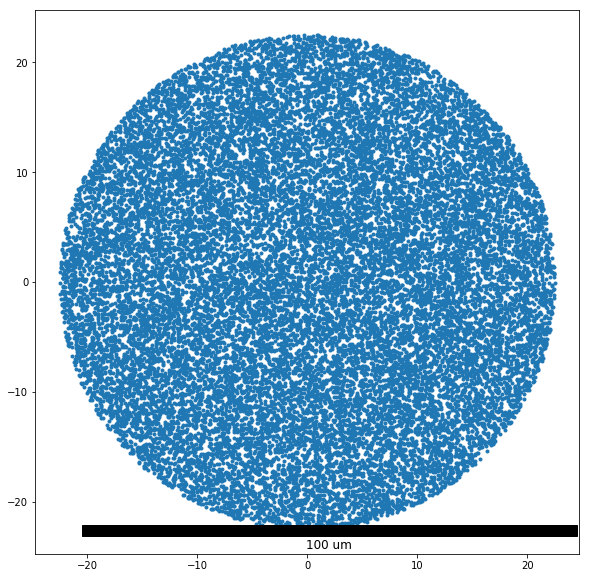

In [67]:
fig, ax = plt.subplots(1, 1, sharex='col',figsize=[20,10])
ax.plot(pts[:,0], pts[:,1], '.')
fontprops = fm.FontProperties(size=12)

scalebar = AnchoredSizeBar(ax.transData, 45, '100 um', 'lower right', 
                           pad=0.1,
                           frameon=False,
                           size_vertical=1,
                           fontproperties=fontprops)
ax.add_artist(scalebar)
ax.set_aspect('equal')

In [62]:
c_area = (np.pi * radius * radius)/2
ev_area = (np.pi * 0.01 * 0.01)/2
0.83*((radius*radius)/(0.01*0.01))-1.9, 10/0.01

(4201873.1, 1000.0)

In [88]:
# find what points are in range
pts_in_range = []
r_min = 15 * 15
r_max = 18 * 18
mx = 0
mn = 0
for i in range(len(pts)):
    r = np.dot(pts[i,:], pts[i,:])
    if r > mx:
        mx = r
    elif r < mn:
        mn = r
    if r_min <= r <= r_max:
        pts_in_range.append(i)

ns = [i for i in range(len(pts)) if i not in pts_in_range]
print(len(pts_in_range))

4830


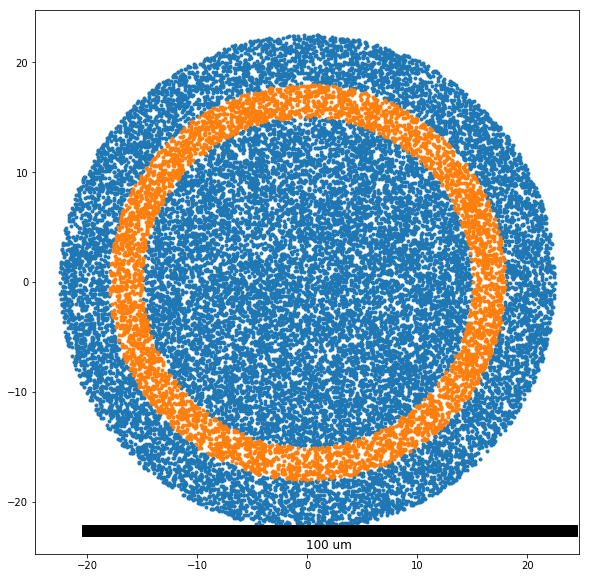

In [89]:
fig, ax = plt.subplots(1, 1, sharex='col',figsize=[20,10])

ax.plot(pts[ns,0], pts[ns,1], '.')
ax.plot(pts[pts_in_range, 0], pts[pts_in_range, 1], '.')
fontprops = fm.FontProperties(size=12)

scalebar = AnchoredSizeBar(ax.transData, 45, '100 um', 'lower right', 
                           pad=0.1,
                           frameon=False,
                           size_vertical=1,
                           fontproperties=fontprops)
ax.add_artist(scalebar)
ax.set_aspect('equal')